In [2]:
import geopandas as gpd
import cartopy
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid.inset_locator import InsetPosition
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import numpy as np
from pyproj import Proj, transform

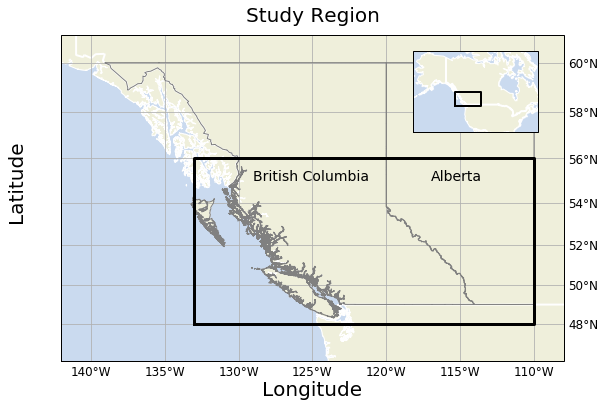

In [10]:
#Make map of study region

#save the figure (1 = save, 0 = don't save)
saveIt = 0
saveEPS = 0

##### plot closeup

ocean = cfeature.NaturalEarthFeature(
    'physical',
    'ocean',
    '10m',
    edgecolor='w',
    alpha = 0.5,
    facecolor=cfeature.COLORS['water'],
    linewidth = 1
)

borders = cfeature.NaturalEarthFeature(
    'cultural',
    'admin_0_boundary_lines_land',
    '10m',
    edgecolor='w',
    facecolor=cfeature.COLORS['land'],
    linewidth = 2
)

coasts = cfeature.GSHHSFeature(
    scale = 'intermediate',
    levels = [1],
    facecolor = cfeature.COLORS['land'],
    alpha = 1.,
    edgecolor = 'w',
    linewidth = 1
)

fig = plt.figure(figsize=(9,6))

canada_east = -108
canada_west = -142
canada_north = 60
canada_south = 46
xy_text_bc = [-129, 55]
xy_text_ab = [-117, 55]
ax1 = fig.add_subplot(1,1,1,projection=ccrs.Mercator(), aspect = 'auto')
ax1.set_extent([canada_west,canada_east,canada_south,canada_north])
ax1.add_feature(ocean)
ax1.add_feature(coasts)
ax1.add_feature(borders)
ax1.text(x = xy_text_bc[0], y = xy_text_bc[1], s = 'British Columbia', transform = ccrs.PlateCarree(), fontsize = 14)
ax1.text(x = xy_text_ab[0], y = xy_text_ab[1], s = 'Alberta', transform = ccrs.PlateCarree(), fontsize = 14)
gl = ax1.gridlines(draw_labels = True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(np.arange(-150,-100,5))
gl.ylocator = mticker.FixedLocator(np.arange(40,70,2))
gl.xlabel_style = {'size' : 12}
gl.ylabel_style = {'size' : 12}
gl.xlabels_top = False
gl.ylabels_left = False
ax1.text(-0.07, 0.55, 'Latitude', va='bottom', ha='center', rotation='vertical', rotation_mode='anchor', transform=ax1.transAxes, fontsize = 20)
ax1.text(0.5, -0.12, 'Longitude', va='bottom', ha='center', rotation='horizontal', rotation_mode='anchor', transform=ax1.transAxes, fontsize = 20)
plt.title('Study Region', y = 1.02, fontsize = 20)

#plot provincial boundaries
# provshapes_filename = './Data/PROVINCE.SHP'
# provshapes_filename = './Data/province/province.shp'
provshapes_filename = './Data/province_borders/lpr_000b16a_e.shp'
provshapes = gpd.read_file(provshapes_filename)
inProj = Proj(init = 'epsg:3347') #manually reproject from Lambert Conformal Conic
outProj = Proj(init='epsg:4326') #to WGS84 (latitude/longitude)
for provIndex in [8,9]:#[0,11]:
    
    provPoly = provshapes['geometry'][provIndex] #polygon(s) of province

    if len(np.shape(provPoly)) == 0: #if only one polygon to plot

        lonBorder,latBorder = provPoly.exterior.coords.xy 
        lonBorder,latBorder = transform(inProj, outProj, lonBorder, latBorder)
        ax1.plot(lonBorder,latBorder,'gray', transform = ccrs.PlateCarree(), linewidth = 1)

    else: #if multiply polygons in shape to plot

        for ind in range(len(provPoly)):

            lonBorder_segment,latBorder_segment = provPoly[ind].exterior.coords.xy 
            lonBorder_segment,latBorder_segment = transform(inProj, outProj, lonBorder_segment, latBorder_segment)
            ax1.plot(lonBorder_segment,latBorder_segment,'gray', transform = ccrs.PlateCarree(), linewidth = 1)

#bounding box
x = [-133,-133,-110,-110,-133]
y = [48,56,56,48,48]
ax1.plot(x,y, 'k', transform = ccrs.PlateCarree(), linewidth = 3)

##### plot zoomout

ocean = cfeature.NaturalEarthFeature(
    'physical',
    'ocean',
    '110m',
    edgecolor='w',
    alpha = 0.5,
    facecolor=cfeature.COLORS['water'],
    linewidth = 1)

borders = cfeature.NaturalEarthFeature(
    'cultural',
    'admin_0_boundary_lines_land',
    '110m',
    edgecolor='w',
    facecolor=cfeature.COLORS['land'],
    linewidth = 2)

coasts = cfeature.GSHHSFeature(
    scale = 'coarse',
    levels = [1],
    facecolor = cfeature.COLORS['land'],
    edgecolor = 'w',
    linewidth = 1)

canada_east = -60
canada_west = -170
canada_north = 60
canada_south = 30
ax2 = plt.axes([0,0,1,1], projection = ccrs.Mercator(), aspect = 'auto')
ip = InsetPosition(ax1, [0.7,0.7,0.25,0.25])
ax2.set_axes_locator(ip)
ax2.set_extent([canada_west,canada_east,canada_south,canada_north])
ax2.add_feature(ocean)
ax2.add_feature(coasts)
ax2.add_feature(borders)

#bounding box
x = [-133,-133,-110,-110,-133]
y = [48,56,56,48,48]
ax2.plot(x,y, 'k', transform = ccrs.PlateCarree(), linewidth = 2)

if saveIt:
    filedir = '/Users/samanderson/repos/cnn_lstm_era/Figures/'
    filename = 'study_region.png'
    plt.savefig(filedir + filename, dpi=300,bbox_inches='tight')
   
if saveEPS:
    filedir = '/Users/samanderson/repos/cnn_lstm_era/Figures/'
    filename = 'study_region.eps'
    plt.savefig(filedir + filename, format = 'eps', bbox_inches='tight')

plt.show()